<a href="https://colab.research.google.com/github/Jordy-Rodrigues/PREVIS-O-VENDAS/blob/main/PREVIS%C3%83O_VENDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO DE MACHINE LEARNING - PREVISÃO DE VENDAS



In [49]:
# IMPORTAR AS BIBLIOTECAS PANDAS E NUMPY
import pandas as pd
import numpy as np

In [50]:
# ABRIR A TABELA COM PANDAS
Tabela = pd.read_csv('/content/drive/MyDrive/advertising.csv')

Tabela
# OBS:'TV','Radio','Jornal' SÃO INVESTIMENTOS EM ANÚNCIOS EM MILHARES DE REIAS,E 'Vendas' FATURAMENTO EM MILHÕES DE REIS

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [51]:
# MOSTRAR UMA TABELA COM INFORMAÇÕES SOBRE A BASE DE DADOS
print(Tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [52]:
# IMPORTAR AS BIBLIOTECAS PARA CRIAR GRÁFICOS
import seaborn as sns
import matplotlib.pyplot as plt

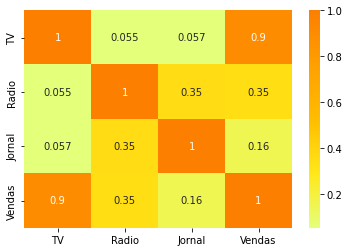

In [53]:
# CRIAR UM GRÁFICO UTILIZANDO O SEABORN
sns.heatmap(Tabela.corr(), cmap='Wistia', annot=True)
# MOSTRAR O GRÁFICO
plt.show()

In [54]:
# SEPARAR A BASE DE DADOS EM X E Y
x= Tabela[["TV","Radio","Jornal"]] 
y= Tabela["Vendas"] 

In [55]:
# SEPARAR A BASE DE DADOS EM DADOS DE TREINO E DADOS DE TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste= train_test_split(x,y,test_size=0.3)

In [56]:
# UTILIZAR DOIS MODELOS DE MACHINE LEARNING
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [57]:
# CRIAR A INTELIGENCIA ARTIFICIAL
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

In [58]:
# TREINAR OS DOIS MODELOS
modelo_regressaolinear.fit(x_treino, y_treino)

LinearRegression()

In [59]:
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [60]:
# TESTAR OS DOIS MODELOS E VER QUAL É O MELHOR
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

In [61]:
# CALCULAR AS MÉTRICAS
from sklearn import metrics
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste,previsao_arvoredecisao))

0.9023830944734706
0.953866464338198


In [62]:
# OBS: MELHOR MODELO DE PREVISÃO FOI A ÁRVORE DE DECISÃO, ESTE MODELO VAI SER UTILIZADO NO FINAL

In [63]:
# CRIAR UM DATAFRAME NO PANDAS
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste']= y_teste
tabela_auxiliar['previsao_arvoredecisao']= previsao_arvoredecisao
tabela_auxiliar['previsao_regressaolinear']= previsao_regressaolinear

<function matplotlib.pyplot.show>

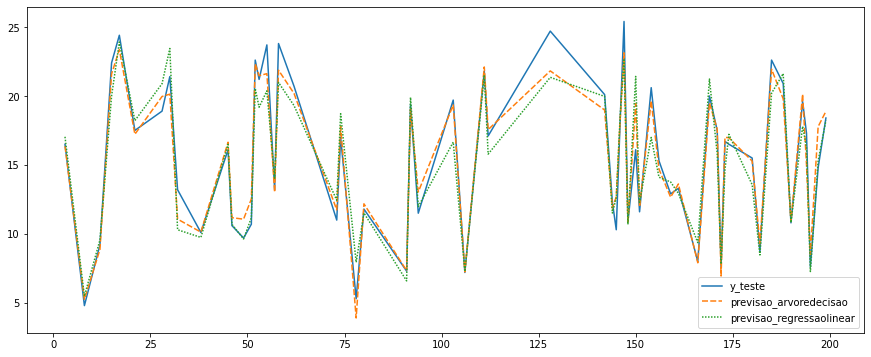

In [64]:
# VISUALIZAR O RESULTADO DO TREINAMENTO EM UM GRÁFICO
plt.figure(figsize=(15,6))
sns.lineplot(data = tabela_auxiliar)
plt.show

In [65]:
# IMPORTAR UMA NOVA PLANILHA PARA TESTAR O MODELO
# OBS: NESSA PLANILHA VAI TER OS INVESTIMENTOS DA EMPRESA EM TV,RADIO E JORNAL PARA O PRÓXIMO MÊS 
novos = pd.read_csv('/content/drive/MyDrive/novos.csv')

In [66]:
# EXIBIR OS DADOS DA PLANILHA
display(novos)

# O MODELO VAI PEGAR OS DADOS DA PLANILHA E FAZER UMA PREVISÃO DE FATURAMENTO DO MÊS SEGUINTE
previsao= modelo_arvoredecisao.predict(novos)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,9.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.225  9.098 19.764]


In [67]:
# OBS: ESTE PROJETO É APENAS MAIS UM PROJETO DE ESTUDOS QUE EU USEI PARA ADQUIRIR MAIS CONHECIMENTO.